# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [1]:
!pip install matplotlib
import warnings
warnings.filterwarnings("ignore")

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score,auc,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [7]:
df = pd.read_csv('marketing.csv',encoding='unicode_escape')

In [4]:
df.sample(n=5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
1066,3005,1992,Graduation,Single,83528.0,0,0,1/5/2014,7,530,...,10,8,1,1,0,0,1,0,0,1
799,8523,1968,Graduation,Married,19329.0,1,0,14-12-2013,39,24,...,0,3,8,0,0,0,0,0,0,0
1334,2535,1978,Master,Married,88097.0,1,0,18-08-2012,24,163,...,5,8,9,0,1,1,1,0,0,1
890,1928,1973,Graduation,Married,31814.0,1,0,9/2/2013,73,35,...,0,3,9,1,0,0,0,0,0,0
387,6202,1960,Graduation,Together,63381.0,0,1,5/10/2012,78,571,...,5,13,2,0,0,0,0,0,0,0


### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [5]:
df.isnull().sum()/len(df)*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

In [8]:
df['Income'] = df['Income'].fillna(df['Income'].median())

### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [8]:
len(df[df.duplicated()])

0

### 5. Drop the columns which you think redundant for the analysis 

In [9]:
df = df.drop(['ID','Dt_Customer'], axis = 1)

### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [11]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [12]:
df['Marital_Status'] =df['Marital_Status'].replace({'Married':'relationship','Together':'relationship','Divorced':'Single',
                                                   'Widow':'Single','Alone':'Single','YOLO':'Single','Absurd':'Single'})

In [13]:
df['Marital_Status'].unique()

array(['Single', 'relationship'], dtype=object)

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [11]:
df['Total_Expenses'] = df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']
print(df['Total_Expenses'].head())

0    1617
1      27
2     776
3      53
4     422
Name: Total_Expenses, dtype: int64


### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [13]:
df['Num_Total_Purchases'] = df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']+df['NumDealsPurchases']
df['Num_Total_Purchases']                                                                                              

0       25
1        6
2       21
3        8
4       19
        ..
2235    18
2236    22
2237    19
2238    23
2239    11
Name: Num_Total_Purchases, Length: 2240, dtype: int64

### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [14]:
df['Kids'] = df['Kidhome']+df['Teenhome']
df['Kids']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Kids, Length: 2240, dtype: int64

### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [16]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']
df['TotalAcceptedCmp']

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    1
Name: TotalAcceptedCmp, Length: 2240, dtype: int64

### 11. Drop those columns which we have used above for obtaining new features

In [18]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Total_Expenses', 'Num_Total_Purchases', 'Kids',
       'TotalAcceptedCmp', 'age'],
      dtype='object')

In [19]:
df = df.drop(['TotalAcceptedCmp','Kids','Num_Total_Purchases','Total_Expenses'], axis = 1)

In [20]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'age'],
      dtype='object')

### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [17]:
df['age'] = 2022 - df['Year_Birth']

In [27]:
df = df.drop(['Year_Birth'], axis = 1)

### 13. Encode the categorical variables in the dataset

In [43]:
cat = ['Education', 'Marital_Status']
lbl = LabelEncoder()
for i in cat:
    df[i]=df[[i]].apply(lbl.fit_transform)

### 14. Standardize the columns, so that values are in a particular range

In [44]:
df1 = df.copy()
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index = df1.index, columns = df1.columns)

In [45]:
scaled_features_df.head(3)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age
0,-0.350141,0.251004,0.235696,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,...,-0.550785,0.693904,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,2.388846,0.985345
1,-0.350141,0.251004,-0.235454,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,...,-1.166125,-0.130463,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612,1.235733
2,-0.350141,1.180340,0.773999,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,...,1.295237,-0.542647,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612,0.317643


### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [41]:
cov_matrix = np.cov(scaled_features.T)
cov_matrix

array([[ 1.00044663e+00,  7.09359926e-03,  1.20032717e-01,
        -4.55846687e-02,  1.18537895e-01, -1.17336854e-02,
         1.97663931e-01, -8.04479228e-02,  3.36401826e-02,
        -1.12272706e-01, -1.05263841e-01, -9.55315770e-02,
         3.00883137e-02,  8.19442467e-02,  7.08136347e-02,
         7.05142844e-02, -4.02988173e-02,  5.83883041e-03,
         5.32894097e-02,  3.33606497e-02, -1.08496219e-02,
         2.13783967e-02, -5.05625191e-02,  9.08600553e-02,
         1.71466853e-01],
       [ 7.09359926e-03,  1.00044663e+00,  2.11543904e-02,
        -2.25633587e-02, -3.59761188e-03,  1.41648789e-02,
         8.20842851e-03,  5.93412251e-04,  3.07031169e-02,
         3.58238734e-02,  1.73894770e-02,  1.68900885e-03,
        -2.17814143e-02, -1.89493823e-03,  1.51319349e-02,
         1.41215486e-03, -3.12239808e-02, -2.71253859e-02,
         1.43874748e-02,  1.28225854e-02, -1.71048114e-02,
         1.84250307e-02, -5.72028181e-03, -1.14083465e-02,
         6.06069703e-02],
    

In [42]:
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print('eig values:','\n',eig_vals)
print('\n')
print('eig vectors:', '\n', eig_vectors)

eig values: 
 [6.52077723 2.07952552 1.91659732 1.45195471 1.17304869 1.03266961
 1.00392603 0.99874895 0.94636578 0.8331665  0.19258652 0.74661965
 0.69418358 0.24392067 0.30347969 0.31131451 0.63693394 0.60971792
 0.58570395 0.53154411 0.51722965 0.46419369 0.43241172 0.37688946
 0.4076563 ]


eig vectors: 
 [[ 1.97523606e-02 -2.39909360e-01 -1.23776460e-01 -2.64585145e-01
  -4.68111656e-01 -2.13133478e-01  2.08458273e-01 -1.66918991e-01
   3.91809498e-01  2.29916489e-01  7.06713152e-02 -4.91455519e-02
   3.02763223e-01 -4.67211026e-02  4.33665357e-02  8.47820256e-02
   2.68257107e-01 -5.70253822e-02 -2.44020801e-02  2.88634770e-01
   6.72533782e-02 -1.15909350e-01  1.64428321e-01  6.19671343e-03
   9.09652448e-04]
 [ 1.03360960e-02 -5.09083294e-03  2.34387047e-02 -1.33164010e-01
  -8.32075360e-03  3.23230296e-01 -7.73013746e-01 -3.88357866e-01
   3.20614917e-01  5.09869917e-02  1.25945717e-03 -5.28383699e-02
  -1.04836065e-01  1.36562228e-02  2.46329242e-03 -8.18735586e-03
   7.0402

In [39]:
total = sum(eig_vals)
var_exp = [(i/total)*100 for i in sorted(eig_vals,reverse = True)]
cum_var_exp = np.cumsum(var_exp)

print('Explained variance:', var_exp)
print('cummulative variance explained:', cum_var_exp)

Explained variance: [26.07146468744724, 8.314388634405484, 7.662966797652211, 5.805226051721892, 4.690100025809265, 4.128834402369024, 4.013911390315904, 3.9932123035618132, 3.7837731732369653, 3.3311782086576445, 2.9851453426110073, 2.7754946971735266, 2.5465983751295154, 2.437782884715224, 2.341769913990333, 2.125227259934942, 2.0679949895029845, 1.8559458248579506, 1.7288747160161246, 1.629897242204393, 1.5068848430641966, 1.2447021319970286, 1.2133768436478618, 0.9752470937500403, 0.7700021662274208]
cummulative variance explained: [ 26.07146469  34.38585332  42.04882012  47.85404617  52.5441462
  56.6729806   60.68689199  64.68010429  68.46387747  71.79505568
  74.78020102  77.55569571  80.10229409  82.54007697  84.88184689
  87.00707415  89.07506914  90.93101496  92.65988968  94.28978692
  95.79667176  97.0413739   98.25475074  99.22999783 100.        ]


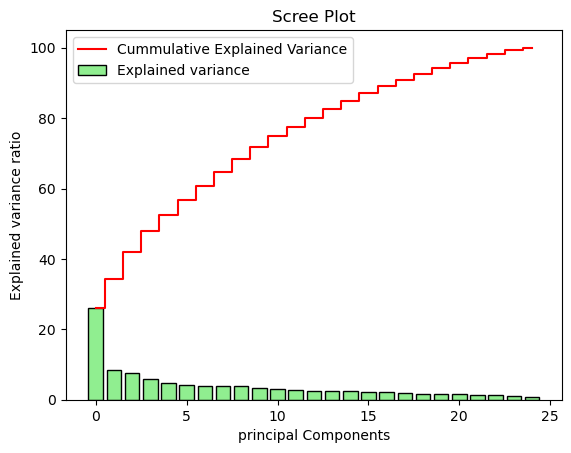

In [52]:
##Scree plot
plt.bar(range(25),var_exp,align='center', color = 'lightgreen', edgecolor = 'black', label = 'Explained variance')
plt.step(range(25), cum_var_exp,where='mid', color='red', label = 'Cummulative Explained Variance')
plt.xlabel('principal Components')
plt.ylabel('Explained variance ratio')
plt.title('Scree Plot')
plt.legend(loc = 'best')
plt.show()

### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [56]:
pca = PCA(n_components = 8)

pca_df = pd.DataFrame(pca.fit_transform(scaled_features_df), columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,3.761193,-0.300589,-0.414185,1.938490,-0.499149,0.339889,-0.716948,-0.273223
1,-2.374080,0.187720,-0.236268,-1.017997,-0.559938,0.465505,-0.490304,0.290448
2,1.623496,-0.170628,-1.115931,-0.233487,-0.119940,-0.068808,-1.495494,0.374079
3,-2.505794,-1.443376,0.204285,0.068624,0.254336,-0.364474,-1.315640,0.087233
4,-0.435241,0.020251,-0.466583,0.319716,0.596745,-0.944253,1.524864,-1.006550


In [59]:
cluster_errors =[]
cluster_range = range(2,15)
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,random_state = 100)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)

### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

In [68]:
cluster_df = pd.DataFrame({'num_clusters':cluster_range,'cluster errors':cluster_errors})

plt.figure(figsize=[15,5])
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],marker='o',color ='b')
plt.show()

KeyError: 'cluster_errors'

<Figure size 1500x500 with 0 Axes>

### Visualization and Interpretation of results

-----
## Happy Learning
-----